<a href="https://colab.research.google.com/github/fmuranda/Climate_Science-/blob/main/tutorials/Projects_GoodResearchPractices/student/Projects_Tutorial5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/Projects_GoodResearchPractices/student/Projects_Tutorial5.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/Projects_GoodResearchPractices/student/Projects_Tutorial5.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 5: Drafting the Analysis

**Good Research Practices**

**Content creators:** Marguerite Brown, Zane Mitrevica, Natalie Steinemann, Yuxin Zhou

**Content reviewers:** Katrina Dobson, Sloane Garelick, Maria Gonzalez, Nahid Hasan, Paul Heubel, Beatriz Cosenza Muralles, Sherry Mi, Cheng Zhang

**Content editors:** Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth

# Tutorials Objectives

In Tutorials 5-8, you will learn about the research process. This includes how to

5.   Draft analyses of data to test a hypothesis
6.   Implement analysis of data
7.   Interpret results in the context of existing knowledge
8.   Communicate your results and conclusions

By the end of these tutorials you will be able to:

*   Understand the principles of good research practices
*   Learn to view a scientific data set or question through the lens of equity: Who is represented by this data and who is not? Who has access to this information? Who is in a position to use it?


In [1]:
# imports

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import interpolate
from scipy import stats

In [2]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [3]:
# @title Video 1: Drafting the Analysis

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'F7ymmfcnG6w'), ('Bilibili', 'BV1Gh4y1f7jC')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [4]:
# @title Tutorial slides
# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
link_id = "qxcmj"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/qxcmj/


# Coding Exercise 1

To explore the relationship between CO<sub>2</sub> and temperature, you may want to make a scatter plot of the two variables, where the x-axis represents CO<sub>2</sub> and the y-axis represents temperature. Then you can see if a linear regression model fits the data well.

Before you do that, let's learn how to apply a linear regression model using generated data.

If you aren't familiar with a linear regression model, it is simply a way of isolating a relationship between two variables (e.g. x and y). For example, each giraffe might have different running speeds. You might wonder if taller giraffes run faster than shorter ones. How do we describe the relationship between a giraffe's height and its running speed? A linear regression model will be able to provide us with a mathematical equation:

$$
\text{speed} = a * \text{height} +  b
$$

where $a$ and $b$ are the slope and intercept of the equation, respectively. Such an equation allows us to predict an unknown giraffe's running speed by simply plugging its height into the equation. Not all giraffes will fit the relationship and other factors might influence their speeds, such as health, diet, age, etc. However, because of its simplicity, linear regression models are usually first attempted by scientists to quantify the relationship between variables.

For more information on linear regression models, see the [Wikipedia page](https://en.wikipedia.org/wiki/Linear_regression), especially the first figure on that page:

Text(0, 0.5, 'y')

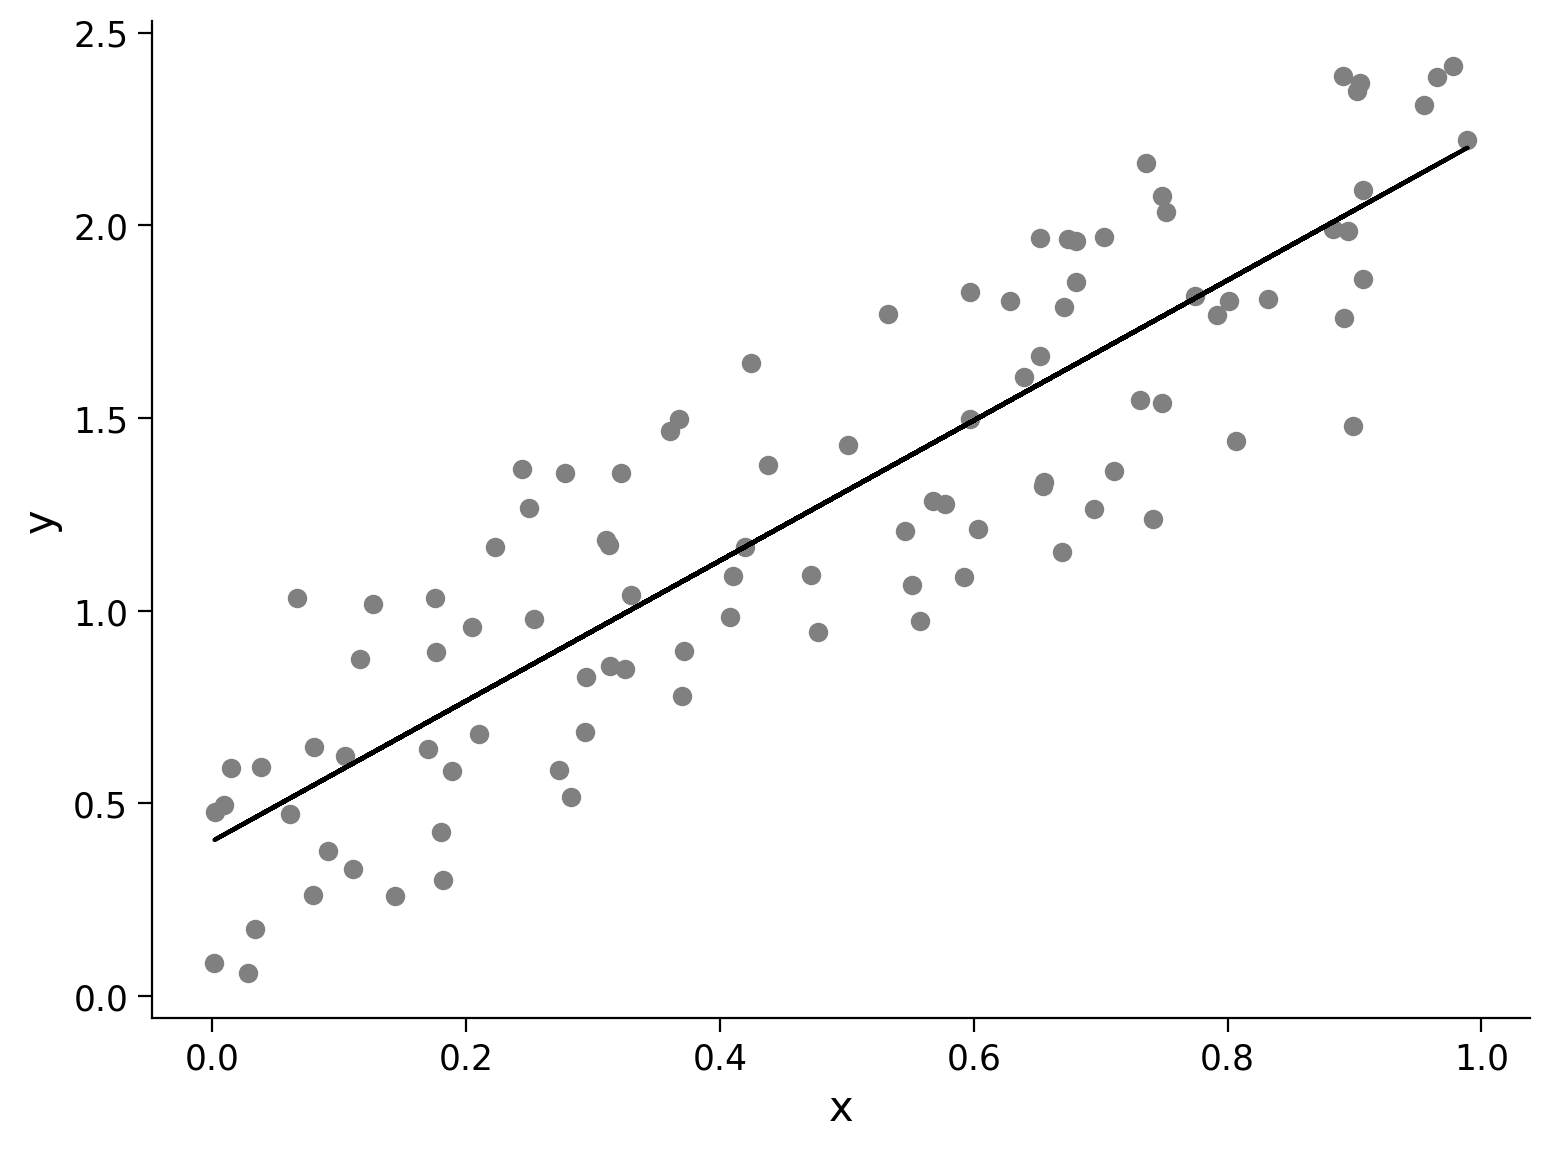

In [5]:
# set up a random number generator
rng = np.random.default_rng()
# x is one hundred random numbers between 0 and 1
x = rng.random(100)
# y is one hundred random numbers according to the relationship y = 1.6x + 0.5
y = 1.6 * x + rng.random(100)

# plot
fig, ax = plt.subplots()
ax.scatter(x, y, color="gray")

# regression
res = stats.linregress(x, y)  # ordinary least sqaure

ax.plot(x, x * res.slope + res.intercept, color="k")
ax.set_xlabel("x")
ax.set_ylabel("y")

To get a sense of how our model fits the data, you can look at the regression results.

In [6]:
# summarize model

print(
    r"Pearson (r$^2$) value: "
    + "{:.2f}".format(res.rvalue**2)
    + " \nwith a p-value of: "
    + "{:.2e}".format(res.pvalue)
)

Pearson (r$^2$) value: 0.78 
with a p-value of: 8.96e-34


Now that we know how to write codes to analyze the linear relationship between two variables, we're ready to move on to real world data!